In [1]:
#@formatter:off
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
#@formatter:on

### 1 BASIC

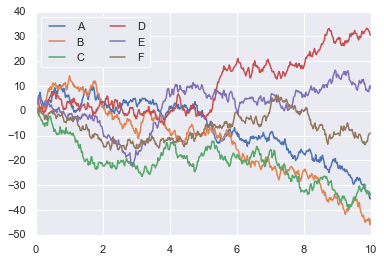

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# sns.lineplot(data=y)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### 2 HISTOGRAMS, KDE

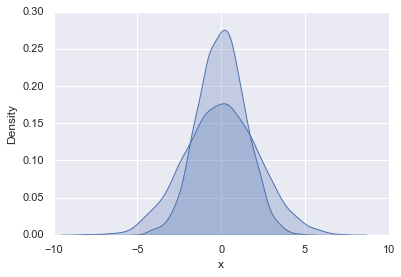

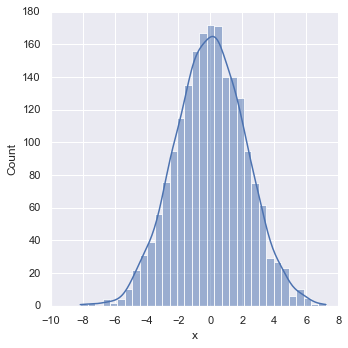

In [3]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    sns.kdeplot(data[col], shade=True)

sns.displot(data['x'], kde=True)

### 3 JOINT DISTRIBUTIONS

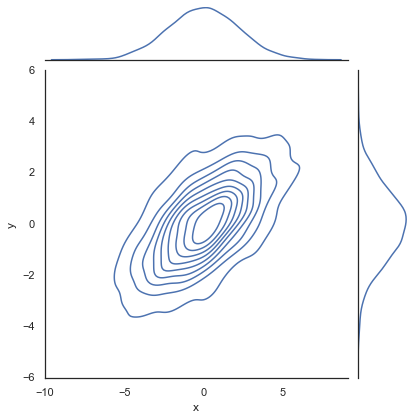

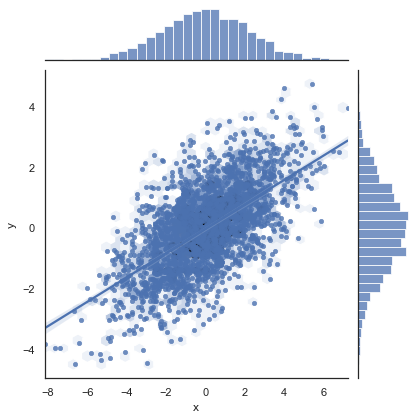

In [4]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde')
    sns.jointplot(x="x", y="y", data=data, kind='hex')
    # sns.jointplot(x="x", y="y", data=data, kind='reg')
    #or
    sns.regplot(x="x", y="y", data=data)

### 4 PAIR PLOTS

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


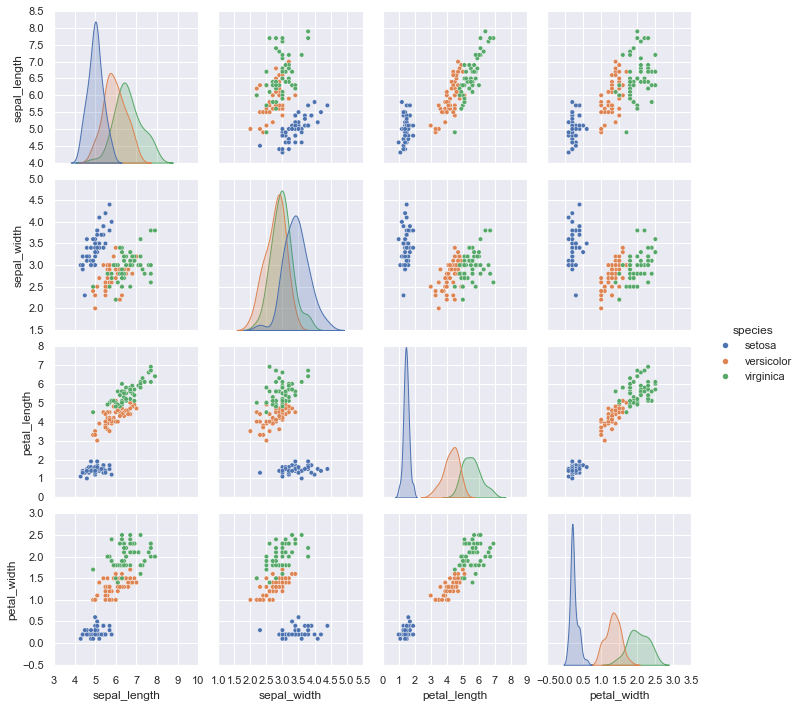

In [5]:
iris = sns.load_dataset("iris")
print(iris.head())
sns.pairplot(iris, hue='species', height=2.5)

### 5 FACET GRID

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


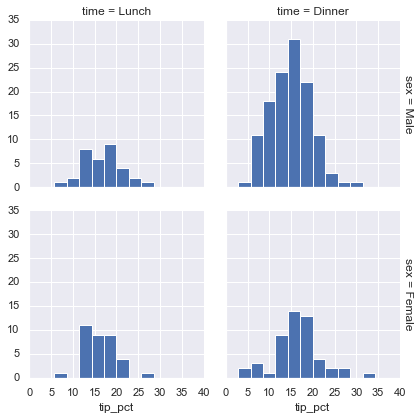

In [6]:
tips = sns.load_dataset('tips')
print(tips.head())
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

### 6 FACTOR PLOTS

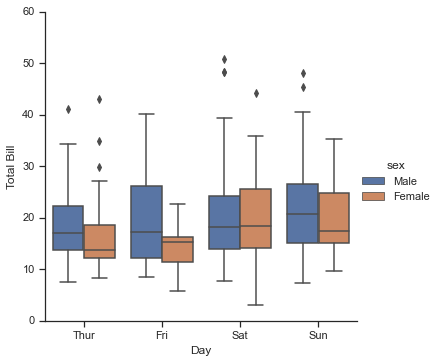

In [7]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

### 7 BAR PLOTS

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

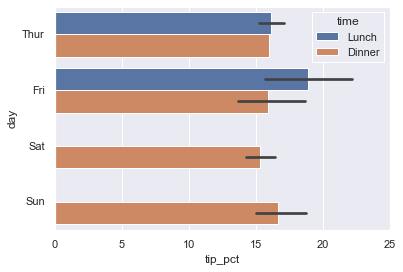

In [8]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


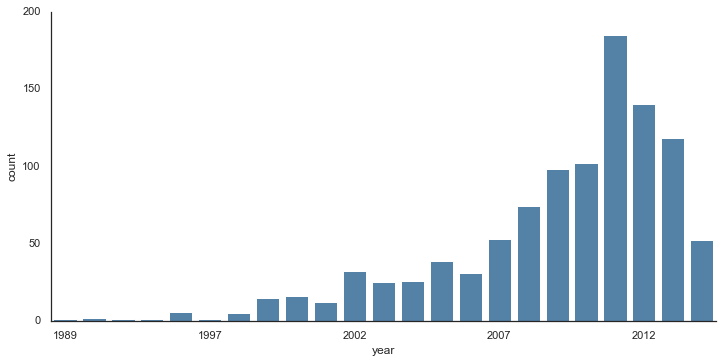

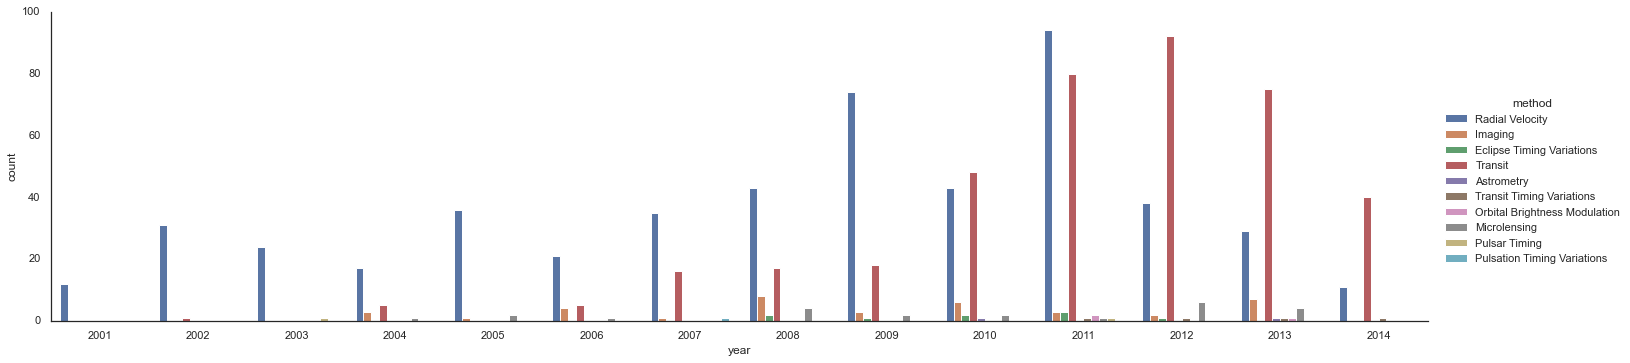

In [9]:
planets = sns.load_dataset('planets')
print(planets.head())

with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))